In [1]:
import pandas as pd
from utility_function import get_X_y , init_model, plot_loss
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense , Input , LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
def init_model(length, n_days, features, style) :
    model = Sequential()
    model.add(LSTM(18,activation = 'tanh',input_shape=(length, features),return_sequences = True))
    model.add(Bidirectional(LSTM(8, activation = 'tanh')))
    #model.add(Bidirectional(LSTM(100,activation = 'tanh',return_sequences = True)))
    #model.add(LSTM(80,activation = 'tanh'))
    #model.add(Dense(60,activation = 'relu'))

    if style == 'linear' :
        model.add(Dense(n_days,activation = 'linear'))

        model.compile(loss = 'mse', optimizer = 'rmsprop',metrics = ['mae'])
    if style == 'clf':
        model.add(Dense(1,activation = 'sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [3]:
n_days = 1
length = 5
df  = pd.read_csv('data_2.csv').set_index('date').dropna()
n = 1880
s = 2610
df_test = df.iloc[s-length+90*8:s+90+90*8]
df_ = df.iloc[n+90*8:s+90*8]
    

In [4]:
len(df_)

730

In [5]:
scaler = MinMaxScaler()
scaler.fit(df_)
df_[df_.columns] =  scaler.transform(df_)
df_test[df_.columns] =  scaler.transform(df_test)

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launch

In [8]:
model = init_model(length, n_days,17,'clf')

In [6]:
X_train, y_train = get_X_y(df_, n_days, length, 'clf')

In [332]:
#es = EarlyStopping(monitor = 'val_accuracy',mode = 'min' , verbose = 1, patience = 20, restore_best_weights = True)

In [347]:
history = model.fit(np.array(X_train), np.array(y_train),
                    #validation_split = 0.3,
                    #callbacks = [es],
                    epochs = 200,
                    batch_size = 64,
                    verbose = True,
                    shuffle = True)

Epoch 1/200
12/12 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5166
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5249
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5249
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5249
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5373
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5249
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5262
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5428
Epoch 9/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5428
Epoch 10/200
12/12 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5262
Epoch 11/

12/12 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.5773
Epoch 84/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.5870
Epoch 85/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.5856
Epoch 86/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.5829
Epoch 87/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.5815
Epoch 88/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6697 - accuracy: 0.5760
Epoch 89/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.5691
Epoch 90/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5801
Epoch 91/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.5829
Epoch 92/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.5843
Epoch 93/200


KeyError: 'val_accuracy'

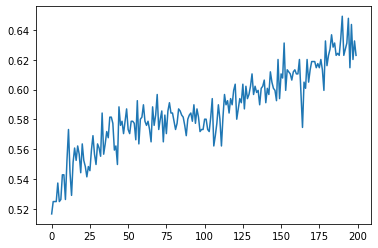

In [348]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [363]:
pred_ = []
pred = []
profit = 1
for x in range(len(df_test)-length):
    y = df_test.drop(columns = 'up')[x:x+length].values
    y.shape = (1, y.shape[0],y.shape[1])
    predict = model.predict(y)
    pred_.append(predict)
    if predict > 0.3 : 
        pred.append(1)
    else : 
        pred.append(0)
    if pred[x-1] == 1 :
        result = ((df['close'].iloc[x] - df['close'].iloc[x-1]) / df['close'].iloc[x-1]) + 1
        profit = profit * result
accuracy = accuracy_score(df_test['up'][length:].values, np.array(pred).ravel())
tn, fp, fn, tp = confusion_matrix(df_test['up'][length:].values, np.array(pred).ravel()).ravel()

In [25]:
df  = pd.read_csv('data_2.csv').set_index('date').dropna()

In [26]:
df['close'] = df['close'].map(lambda x  : np.exp(x))

In [35]:
maxi = 1
for x in range(1,len(df)) :
    t = ((df['close'].iloc[x] - df['close'].iloc[x-1]) / df['close'].iloc[x-1]) + 1
    if t > maxi : 
        maxi = t

In [32]:
df = df[2610:]

In [36]:
maxi

1.2316190464924501

In [262]:
profit = [0]
for x in range(1, len(df)) : 
    profit.append(((df['close'].iloc[x] - df['close'].iloc[x-1]) / df['close'].iloc[x-1]) + 1)

In [263]:
df['profit'] = profit

In [265]:
df_test = df.iloc[s-length:s+90]

In [267]:
df_test['profit'].prod()

1.2542468034919008

In [75]:
df  = pd.read_csv('data_2.csv').set_index('date').dropna()
#df['close'] = df['close'].map(lambda x  : np.exp(x))

In [68]:
n = 1425 +11*90
s = 2520+11*90
score_trim = {}
s += 90
n += 90
score = []
df_test = df.iloc[s:s+90]
df_ = df.iloc[n:s]

In [69]:
df_test['close'] = df_test['close'].map(lambda x  : np.exp(x))

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
profit = []
for x in range(1, len(df_test)) : 
    profit.append(((df_test['close'].iloc[x] - df_test['close'].iloc[x-1]) / df_test['close'].iloc[x-1]) + 1)

In [60]:
min(profit)

0.8966930841710028

In [72]:
df_test['close'].min()

9906.345194010004

In [73]:
profit = []
for x in range(1, len(df_test)) : 
    profit.append(((df_test['close'].iloc[x] - df_test['close'].iloc[x-1]) / df_test['close'].iloc[x-1]) + 1)

In [74]:
min(profit)

0.8966930841710028

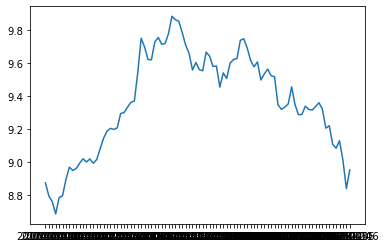

In [80]:
plt.plot(df['close'].iloc[2610:2700])

In [18]:
train = []
for s in range(len(X_train)) : 
    train.append(X_train[s].ravel())

In [13]:
x.reshape(5,17)

array([[0.35403011, 0.67972145, 0.44505477, 0.09903075, 0.48431897,
        0.9725422 , 0.63114472, 0.63919444, 0.63942451, 0.65913575,
        0.52688451, 0.25021661, 0.98763443, 0.68209538, 0.23389719,
        0.65913575, 0.69223656],
       [0.38220976, 0.73463896, 0.45082699, 0.13765251, 0.49138789,
        0.99958069, 0.55811643, 0.63287538, 0.55975813, 0.55832987,
        0.53625358, 0.25575922, 0.9971367 , 0.62140424, 0.21109031,
        0.55832987, 0.6386532 ],
       [0.40942609, 0.77925856, 0.46071071, 0.17902605, 0.48628213,
        0.99711   , 0.69300993, 0.67046126, 0.73069559, 0.74154041,
        0.56047242, 0.26867752, 1.        , 0.74872169, 0.25557081,
        0.74154041, 0.74807518],
       [0.43096782, 0.80999422, 0.47259512, 0.20574836, 0.507065  ,
        0.94880816, 0.6874899 , 0.71825525, 0.67918537, 0.71905269,
        0.60577775, 0.29410462, 0.98311531, 0.70836999, 0.24417051,
        0.71905269, 0.70440322],
       [0.44318828, 0.82619573, 0.48371269, 0.227641

In [2]:
df  = pd.read_csv('data_2.csv').set_index('date').dropna()

In [6]:
df.iloc[2500]

close                  7.947427
rsi_14                60.834745
macd                  22.646398
william_a/d            8.298622
ATR                    5.442247
ath                    0.943570
new_adress            12.610394
sopr                   1.018288
utxo                  13.273710
transac_sec            0.949072
mvrv_z                 4.166735
nvts                  11.019055
pct_profit             0.987998
active_adress         13.377068
hash_rate             43.299689
transactions_count    12.315815
utxo_spent            13.434257
up                     1.000000
Name: 2017-07-22, dtype: float64